In [4]:
import numpy as np

In [6]:
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])
U, S, Vt = np.linalg.svd(A)
print("Matrix A:\n", A)
print("\nU Matrix:\n", U)
print("\nSingular Values:\n", S)
print("\nV^T Matrix:\n", Vt)

Matrix A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

U Matrix:
 [[-0.13472212 -0.82574206  0.54432436  0.06091792]
 [-0.3407577  -0.4288172  -0.77117135  0.32449153]
 [-0.54679327 -0.03189234 -0.09063038 -0.83173682]
 [-0.75282884  0.36503251  0.31747737  0.44632737]]

Singular Values:
 [3.86226568e+01 2.07132307e+00 1.52856047e-15 2.72860272e-16]

V^T Matrix:
 [[-0.4284124  -0.47437252 -0.52033264 -0.56629275]
 [ 0.71865348  0.27380781 -0.17103786 -0.61588352]
 [-0.15245872 -0.18883588  0.83504791 -0.49375331]
 [ 0.52607636 -0.81507117  0.05191325  0.23708156]]


In [8]:
def reconstract_matrix(U,S,Vt):
    return np.dot(U, np.dot(np.diag(S), Vt))
recon_A = reconstract_matrix(U,S,Vt)
print(recon_A)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


In [10]:
reconstract_error = np.linalg.norm(A - recon_A,2)
print(reconstract_error)

1.0821996385275096e-14


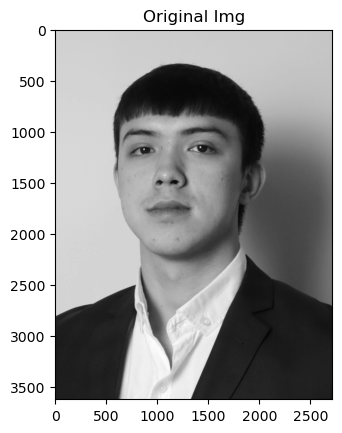

Image original size: 9843691 pixels


In [28]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('my_face.JPG', as_gray=True)

plt.imshow(image, cmap='gray')
plt.title('Original Img')
plt.show()
print(f'Image original size: {np.prod(image.shape)} pixels')

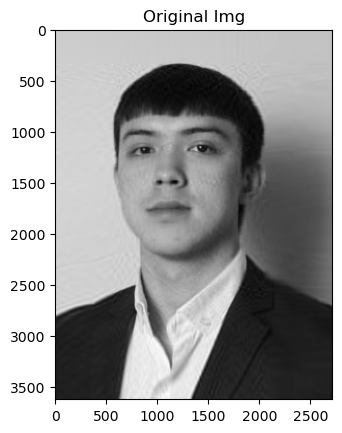

Image original size: 9843691 pixels


In [55]:
U, S, Vt = np.linalg.svd(image)

def reconstract_image(U, S, Vt, k):
    return np.dot(U[:,:k], np.dot(np.diag(S[:k]), Vt[:k]))
recon_img = reconstract_image(U, S, Vt, 50)

plt.imshow(recon_img, cmap='gray')
plt.title('Original Img')
plt.show()
print(f'Image original size: {np.prod(recon_img.shape)} pixels')

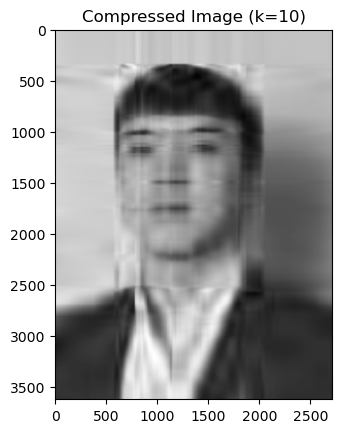

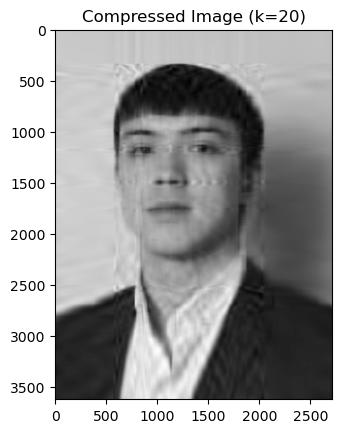

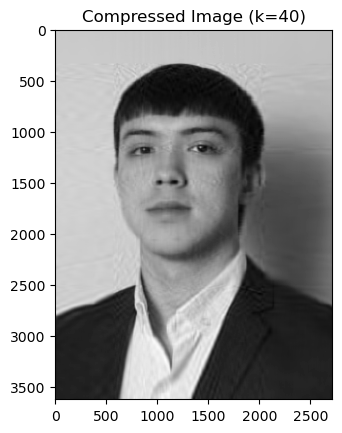

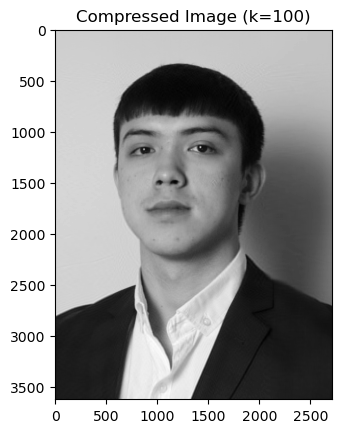

Original size: 20510935, After compressing k10: 63410
Original size: 20510935, After compressing k20: 126820
Original size: 20510935, After compressing k40: 253640
Original size: 20510935, After compressing k100: 634100


In [74]:
ks = [10,20,40,100]

for k in ks:
    recon_img = reconstract_image(U, S, Vt, k)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f'Compressed Image (k={k})')
    plt.show()

original_size = U.size + S.size + Vt.size
compressed_size_k = lambda k: U[:, :k].size + S[:k].size + Vt[:k, :].size
for k in ks:
    print(f'Original size: {original_size}, After compressing k{k}: {compressed_size_k(k)}' )